# Step 1: Bias assessment and correction
This notebook analysis the unconditional bias of total precipitation **for each calendar month**, comparing daily SEAS5 and ERA5 data.

Before an initial assessment of the skill of SEAS5 over the area of interest, both datasets (SEAS5 seasonal forecast as well as ERA5 quasi-observations) will need to be "harmonized". That is any systematic offsets or biases will need to be removed.

One could simply assess anomalies, but for the purpose of impact modelling and specific hydrological indicies such as SPI, absolute values are required. Therefore the assessment is performed on (bias corrected) daily data.

## ToDo
* check multiplicative bias https://climpred.readthedocs.io/en/stable/metrics.html#multiplicative-bias
* [It’s safest to do anything like climatology removal before constructing climpred objects](https://climpred.readthedocs.io/en/stable/prediction-ensemble-object.html) -> In short, any sort of bias correcting or drift correction can also be done **prior** to instantiating a PredictionEnsemble object.
* do bias correction before actual skill computation?
* https://climpred.readthedocs.io/en/stable/api/climpred.classes.HindcastEnsemble.remove_bias.html#climpred.classes.HindcastEnsemble.remove_bias
    * how to apply a simple bias correction to the precipitation dataset?
    * it wraps from XCLIM!
    * https://climpred.readthedocs.io/en/stable/bias_removal.html
* How does verify / remove_bias compute the bias? Montly means? Daily means?

In [30]:
from climpred import HindcastEnsemble
from pathlib import Path
import xarray as xr

import matplotlib.pyplot as plt
import cmocean.cm as cmo # colormaps

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
shp = Path(r"C:/Users/sb123/Documents/OneDrive/04_SS22/climThesis/Data/Geo/THU.shp")
shape_feature = ShapelyFeature(Reader(shp).geometries(), ccrs.PlateCarree(), facecolor="none", edgecolor="red")

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
# read data from netCDFs and set-up a climpred HindcastEnsemble instance
hc = xr.open_dataarray(r"C:\Users\sb123\Documents\Massendaten\hindcast.nc")
obs = xr.open_dataarray(r"C:\Users\sb123\Documents\Massendaten\Observations_fin.nc")
hindcast = HindcastEnsemble(hc)
hindcast = hindcast.add_observations(obs)
del obs, hc

## a) Average bias over all timesteps

INFO:root:initialized | lead: 1.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-02 00:00:00-2016-05-02 00:00:00
INFO:root:initialized | lead: 2.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-03 00:00:00-2016-05-03 00:00:00
INFO:root:initialized | lead: 3.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-04 00:00:00-2016-05-04 00:00:00
INFO:root:initialized | lead: 4.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-05 00:00:00-2016-05-05 00:00:00
INFO:root:initialized | lead: 5.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-06 00:00:00-2016-05-06 00:00:00
INFO:root:initialized | lead: 6.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-07 00:00:00-2016-05-07 00:00:00
INFO:root:initialized | lead: 7.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-08 00:00:00-2016-05-08 00:00:00
INFO:root:initialized | lead: 8.0 | inits: 1994-01-01 00:00:00-2016-0

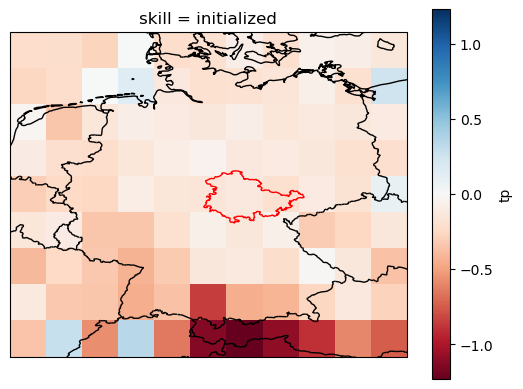

In [37]:
av_bias = hindcast.verify(metric="additive_bias", alignment="same_inits", comparison = "e2o", dim=["init"]).mean(dim="lead")["tp"]
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})
av_bias.plot(ax=ax, cmap="RdBu")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(shape_feature)

Overall the model is slighty too dry. This holds in particular over a narrow strip along western Austria. This pattern is also evident in other assessments (Manzanas, R., J. M. Gutiérrez, J. Bhend, S. Hemri, F. J. Doblas-Reyes, V. Torralba, E. Penabad, and A. Brookshaw. “Bias Adjustment and Ensemble Recalibration Methods for Seasonal Forecasting: A Comprehensive Intercomparison Using the C3S Dataset.” Climate Dynamics 53, no. 3–4 (August 2019): 1287–1305. https://doi.org/10.1007/s00382-019-04640-4.)

Now let us have a look if there may be a dependence on the lead time.

INFO:root:initialized | lead: 1.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-02 00:00:00-2016-05-02 00:00:00
INFO:root:initialized | lead: 2.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-03 00:00:00-2016-05-03 00:00:00
INFO:root:initialized | lead: 3.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-04 00:00:00-2016-05-04 00:00:00
INFO:root:initialized | lead: 4.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-05 00:00:00-2016-05-05 00:00:00
INFO:root:initialized | lead: 5.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-06 00:00:00-2016-05-06 00:00:00
INFO:root:initialized | lead: 6.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-07 00:00:00-2016-05-07 00:00:00
INFO:root:initialized | lead: 7.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-08 00:00:00-2016-05-08 00:00:00
INFO:root:initialized | lead: 8.0 | inits: 1994-01-01 00:00:00-2016-0

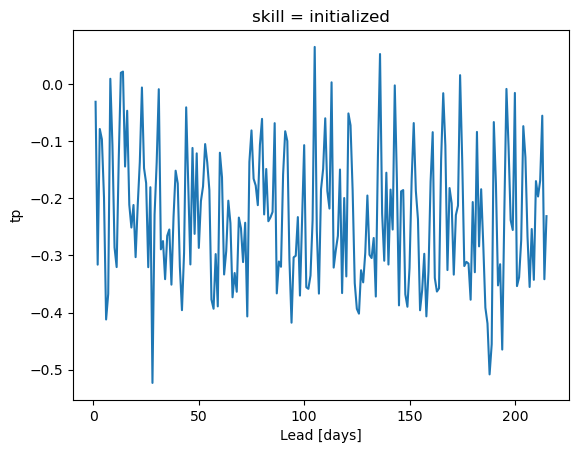

In [43]:
hindcast.mean(["longitude", "latitude"]).verify(metric="additive_bias", comparison="e2o", alignment="same_inits", dim=["init"])["tp"].plot()

The (negative) bias in the region does not appear to strongly depend on lead time. It fluctuates a lot but on average the negative bias prevails as leadtime increases.

Now let us check if the bias depends on the season of the valid time season.

In [3]:
seasonal_bias = hindcast.verify(metric="additive_bias", comparison="e2o", alignment="same_inits", dim=[]).groupby("valid_time.season").mean()["tp"]

INFO:root:initialized | lead: 1.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-02 00:00:00-2016-05-02 00:00:00
INFO:root:initialized | lead: 2.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-03 00:00:00-2016-05-03 00:00:00
INFO:root:initialized | lead: 3.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-04 00:00:00-2016-05-04 00:00:00
INFO:root:initialized | lead: 4.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-05 00:00:00-2016-05-05 00:00:00
INFO:root:initialized | lead: 5.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-06 00:00:00-2016-05-06 00:00:00
INFO:root:initialized | lead: 6.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-07 00:00:00-2016-05-07 00:00:00
INFO:root:initialized | lead: 7.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-08 00:00:00-2016-05-08 00:00:00
INFO:root:initialized | lead: 8.0 | inits: 1994-01-01 00:00:00-2016-0

In [9]:
seasonal_bias

<xarray.DataArray 'tp' (season: 4, latitude: 9, longitude: 11)>
array([[[-8.19550380e-02, -4.08184677e-02, -2.30431572e-01,
         -8.04653764e-03, -1.44028395e-01, -2.18781948e-01,
         -9.25477892e-02, -1.90572351e-01,  1.48239089e-02,
          1.33933812e-01,  1.46832213e-01],
        [-6.15954511e-02, -2.86129005e-02,  2.22993031e-01,
          2.45258823e-01, -2.87787113e-02, -1.35984153e-01,
         -1.63598716e-01, -1.11901991e-01, -6.42044991e-02,
         -1.90440148e-01,  2.27002412e-01],
        [ 8.95097479e-02, -2.24770010e-01, -5.76966107e-02,
          1.94015652e-02, -5.60459793e-02, -4.15851586e-02,
          2.41869316e-02, -6.20199069e-02, -2.03142017e-02,
         -6.00891300e-02, -3.68802324e-02],
        [-8.27366784e-02, -6.49807304e-02, -1.38632745e-01,
         -4.62714471e-02,  1.37651842e-02,  6.03193678e-02,
         -6.53295144e-02, -6.07565120e-02, -2.67404355e-02,
         -9.27727669e-02, -1.35934129e-01],
        [-2.13823333e-01, -1.48693234e-01, -1.40494525e-01,
          1.59214243e-01, -8.16441998e-02, -5.98834008e-02,
         -7.42671937e-02, -1.08523585e-01,  1.66985486e-02,
         -6.47071972e-02,  2.07510665e-01],
...
        [-2.35004887e-01, -2.22728103e-01, -3.14432263e-01,
         -1.60692856e-01, -2.56153136e-01, -2.42969438e-01,
         -2.56272435e-01, -3.37716430e-01, -2.11751401e-01,
         -2.18627498e-01,  2.14711931e-02],
        [-5.53893447e-02, -9.74307731e-02, -3.83316606e-01,
         -3.80432755e-01, -2.43603051e-01, -1.64922193e-01,
         -2.63834685e-01, -2.05289528e-01, -3.93022329e-01,
         -2.29584411e-01, -8.24369565e-02],
        [-4.10543472e-01, -3.15030277e-01, -3.65866154e-01,
         -4.68756050e-01, -3.10726941e-01, -2.00961396e-01,
         -1.89554483e-01, -2.03982174e-01, -1.94758587e-02,
         -8.66492987e-02, -2.95050353e-01],
        [-3.09536695e-01, -4.46838975e-01, -3.71148378e-01,
         -3.60529691e-01, -3.16862822e-01, -6.60176158e-01,
         -3.09627503e-01, -3.20081204e-01, -1.77507445e-01,
         -7.34226108e-02, -2.85600513e-01],
        [-4.89731938e-01,  7.69527853e-02, -4.70131725e-01,
          3.33495885e-01, -4.44800556e-01, -8.05035055e-01,
         -9.78833497e-01, -9.46894169e-01, -8.74674201e-01,
         -5.69749475e-01, -5.72870970e-01]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 5.0 6.0 7.0 8.0 9.0 ... 12.0 13.0 14.0 15.0
  * latitude   (latitude) float32 55.0 54.0 53.0 52.0 51.0 50.0 49.0 48.0 47.0
    skill      <U11 'initialized'
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    units:      mm
    long_name:  Total precipitation

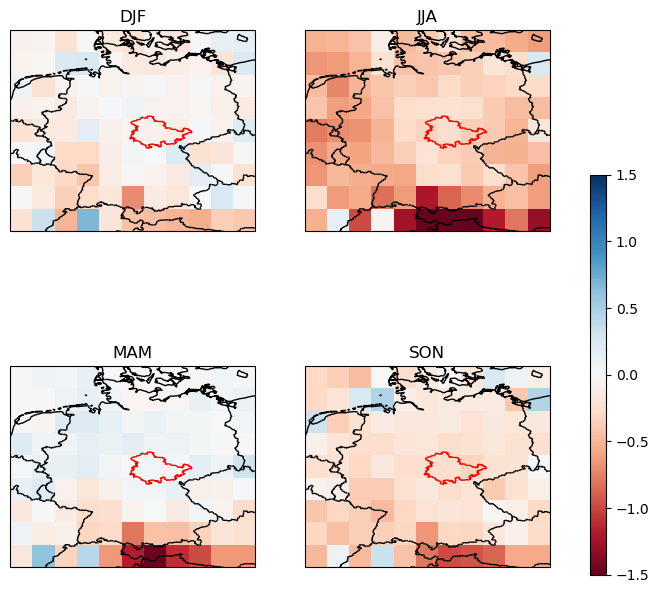

In [36]:
seasons = seasonal_bias.coords["season"].values
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, nrows=2, ncols=2, figsize=(8,8))


for i, season in enumerate(seasons):
    ax.flat[i].add_feature(cfeature.COASTLINE)
    plot = seasonal_bias.isel({"season":i}).plot(ax=ax.flat[i], add_colorbar=False, vmin=-1.5, vmax=1.5, cmap="RdBu")
    ax.flat[i].add_feature(cfeature.BORDERS)
    ax.flat[i].set(title=seasons[i])
    ax.flat[i].add_feature(shape_feature)
# plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.5])
fig.colorbar(plot, cax=cbar_ax)

It appears as if during summer (JJA) and to a lesser extent in fall, the dry bias is more severe than during winter and spring. Also, the magnitude of the bias seems to be correlated with topography and land-sea contrast: Irrespective of the season, stronger biases are observed along the alps and coastline of the Baltic and North Sea.
My assumption is that this is related to a less skillfull parametrisation of convective precipitation, which is generally stronger in summer and can also be related to topography (REFERENCES!).

## b) Aggregate for each season
**NOT SURE HOW**
* **Objective**: Compare average *aseasonal tp sums* for obs and init
* **Problem**, I would need to *resample* from a multidimensional coordinate "valid_time" which links the coordinates init and lead... but resampling is only supported for dimensions I think (Groupby works fine). Thereafter I would need to groupby season and then mean.

In [ ]:
# hindcast.get_initialized().tp.where(hindcast.get_initialized().tp.coords["valid_time.month"] == 1, drop=True)
# hindcast.get_initialized().coords["valid_time"]

C:\Users\sb123\AppData\Local\Temp\ipykernel_12368\918951751.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


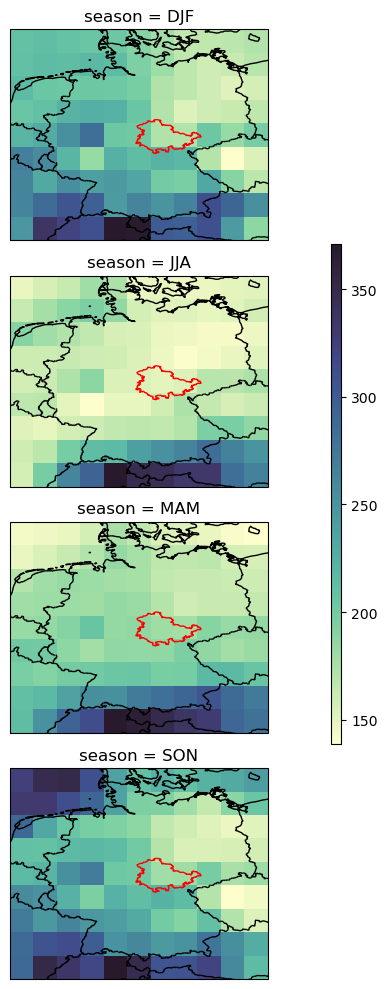

In [38]:
fig, ax = plt.subplots(nrows=4,subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(5,10))
seasonal_obs = hindcast.get_observations()["tp"].resample(time="1QS").sum().groupby("time.season").mean()

for i in range(0,4):
    plot = seasonal_obs.isel({"season":i}).plot(ax=ax.flat[i], cmap=cmo.deep, add_colorbar=False)
    ax.flat[i].add_feature(cfeature.COASTLINE)
    ax.flat[i].add_feature(cfeature.BORDERS)
    ax.flat[i].add_feature(shape_feature)

plt.tight_layout()
fig.show()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.8, 0.25, 0.02, 0.5])
fig.colorbar(plot, cax=cbar_ax)

## c) Compute the bias

In [40]:
bias = hindcast.verify(metric="additive_bias", comparison="e2o", alignment="same_inits", dim=["init"])# train_test_split="unfair-cv", cv="LOO") # LOO cross-validation
unbiased = hindcast.remove_bias(how="additive_mean", alignment="same_inits").verify(metric="additive_bias", comparison="e2o", alignment="same_inits", dim=["init"])
# train_test_split="fair" -> too short of a hindcast period!, should I use LOO here already?

INFO:root:initialized | lead: 1.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-02 00:00:00-2016-05-02 00:00:00
INFO:root:initialized | lead: 2.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-03 00:00:00-2016-05-03 00:00:00
INFO:root:initialized | lead: 3.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-04 00:00:00-2016-05-04 00:00:00
INFO:root:initialized | lead: 4.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-05 00:00:00-2016-05-05 00:00:00
INFO:root:initialized | lead: 5.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-06 00:00:00-2016-05-06 00:00:00
INFO:root:initialized | lead: 6.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-07 00:00:00-2016-05-07 00:00:00
INFO:root:initialized | lead: 7.0 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-08 00:00:00-2016-05-08 00:00:00
INFO:root:initialized | lead: 8.0 | inits: 1994-01-01 00:00:00-2016-0

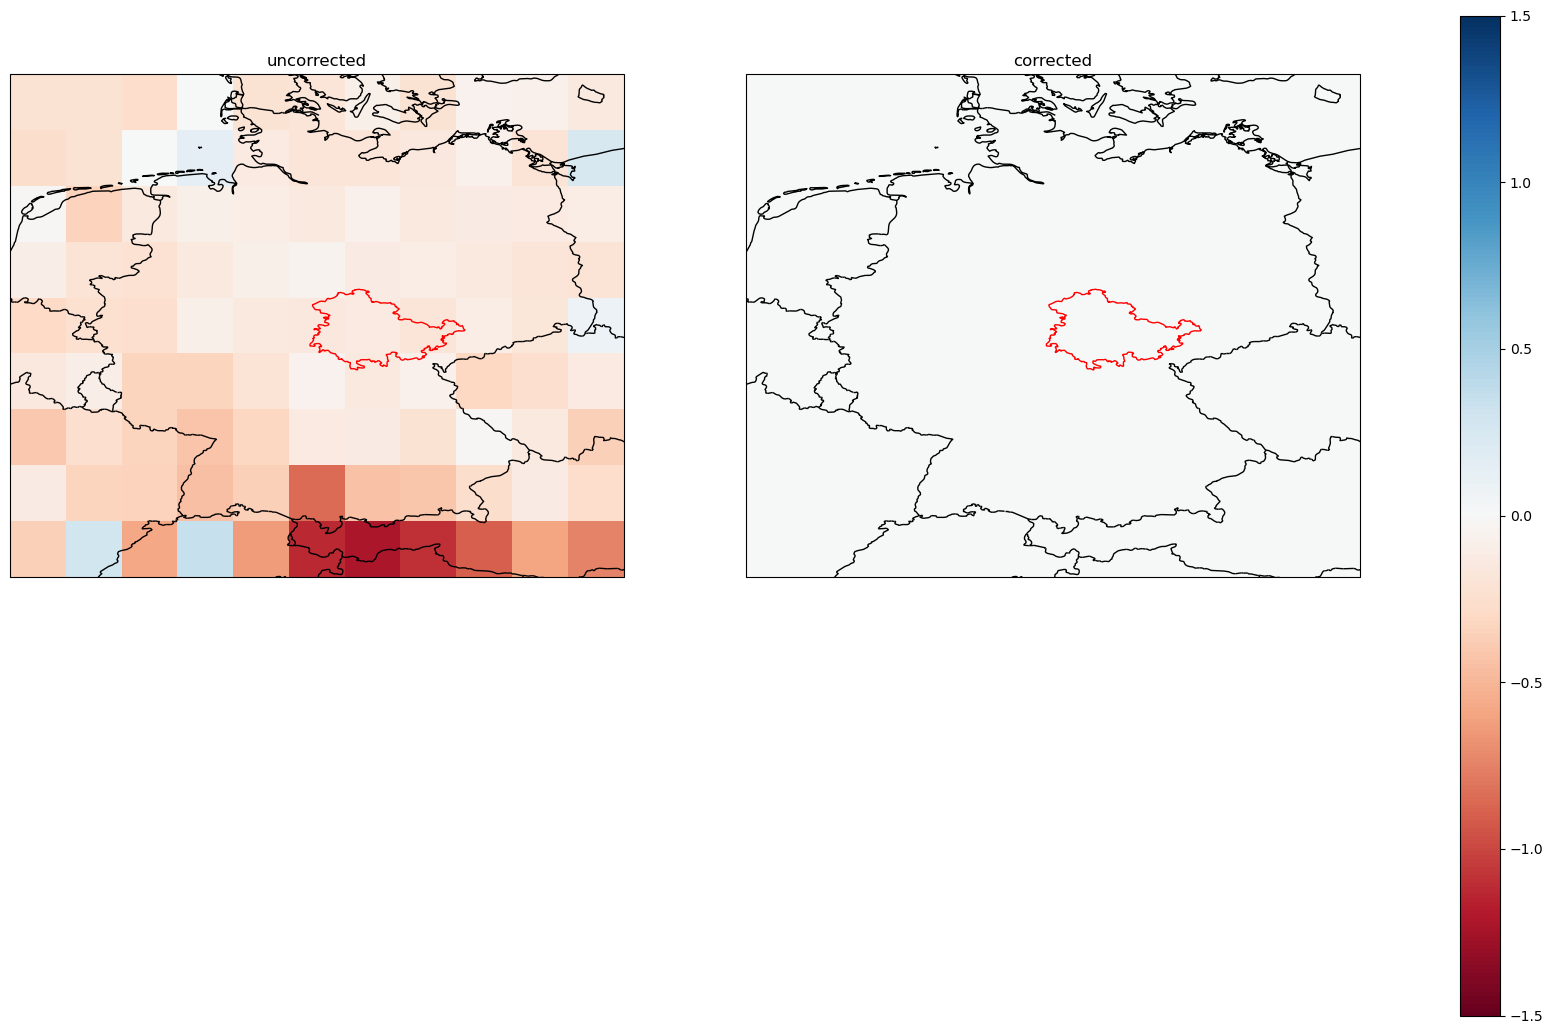

In [41]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, ncols=2, figsize=(20,20))
# bias.groupby("init.month").mean().mean(dim=["latitude", "longitude"])["tp"].plot(ax=ax)
# ax.set(ylabel="Valid time month", xlabel="Lead [days]", title="Summertime dry bias")
data_arrays = [bias["tp"].mean(dim=["lead"]), unbiased["tp"].mean(dim=["lead"])]
titles = ["uncorrected", "corrected"]
for i, ax in enumerate(ax.flat):
    plot = data_arrays[i].plot(add_colorbar=False, ax= ax, cmap = "RdBu", vmin=-1.5, vmax=1.5)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(shape_feature)
    ax.set(title=titles[i])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.5])
fig.colorbar(plot, cax=cbar_ax)

Simple additive bias removement. Now I can do a first assessment of the skill in notebook **Step4_ForecastVerification.ipynb**